In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import pandas as pd
import numpy as np

import sys
import locale

## 1. Подготовка данных к работе

In [2]:
# загружаем данные о ВВП
df_1=pd.read_excel('rus_gdp_data.xls')
df=df_1.transpose()
df.columns = df.iloc[0]
df.drop(df.index[0], inplace= True)

In [3]:
# расчет показателей темпов роста по компонентам, к соотв. периоду предыдущего года
for col_name in df.columns:
    df[col_name+"_gr"]=df[col_name].pct_change(periods=4)

# расчет доли компонентов в % от общего объема номинального ВВП
for col_name in df.columns:
    if col_name[-1:] =='n':
        df[col_name+"_share"]=df[col_name]/df['GDPn']
    

In [4]:
df.head()

Unnamed: 0,GDPr,final_expr,final_exp_hhr,final_exp_govr,final_exp_otherr,gross_accr,gross_acc_investr,expr,impr,stat_descr,...,final_exp_hhn_share,final_exp_govn_share,final_exp_othern_share,gross_accn_share,gross_acc_investn_share,stock_chgn_share,net_expn_share,expn_share,impn_share,stat_descn_share
I квартал 2011,18440.1,14232.8,10136.5,4008.4,90.7,3790.3,2770.6,4659.1,4848.7,410.2,...,0.520338,0.19707,0.0042611,0.185193,0.138236,0.0469566,0.0937366,0.276941,0.183204,-0.000598858
II квартал 2011,19714.8,14860.7,10733.8,4044.9,90.7,5788.8,4109,4991.1,6327,154.3,...,0.503124,0.183252,0.00390722,0.225899,0.188052,0.037846,0.0854186,0.287936,0.202518,-0.0016003
III квартал 2011,20978.4,15634.6,11510.6,4041.8,90.7,7081.3,4947,4655.4,6012.4,-351.3,...,0.49121,0.167856,0.00359466,0.275995,0.206127,0.0698671,0.0638972,0.266563,0.202666,-0.00255309
IV квартал 2011,22617.3,16223.9,12036.3,4110.5,90.8,7401.6,7717.2,5122.2,6075.2,-102.3,...,0.490183,0.162069,0.00338877,0.270007,0.299057,-0.02905,0.0824659,0.290062,0.207596,-0.00811412
I квартал 2012,19492.3,15162,10942.8,4125.8,89.7,4186.8,3116.3,4853.9,5440.5,463.8,...,0.514563,0.195004,0.00399136,0.192935,0.144354,0.0485813,0.101292,0.287128,0.185835,-0.00778513


## 2. Примеры построения графиков
### 2.1 Линейный график

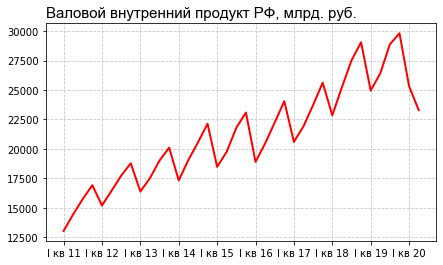

In [5]:
# построим линейный график общего показателя ВВП РФ в текущих ценах

fig=plt.figure()
fig.set_figwidth(7)
ax = fig.add_subplot()


# ниже в формате списка укажем данные, которые будут представлены на графике
y1=df['GDPn'].values
# список с названиями кварталов для для подписей на горизонтальной оси
x1=[x.replace('квартал','кв') for x in df.index.values]
x1=[x.replace(' 20',' ') for x in x1]

# задаем вид графика (линейный) и некоторые допольнительные параметры
ax.plot(x1,y1,
        linestyle = '-',
        linewidth = 2,
        color='red'
       )

# зададим заголовок для нашего графика и некоторые дополнительные параметры
ax.set_title('Валовой внутренний продукт РФ, млрд. руб.',loc='left',fontname='Arial',size=15)
ax.title.set_size(25)
ax.set_xticks(x1[::4])

# показать сетку
ax.grid(axis = 'both',
        linestyle = '--',
        color = '#c6c6ccd9')

plt.show()


### 2.2 Несколько линий на одном графике

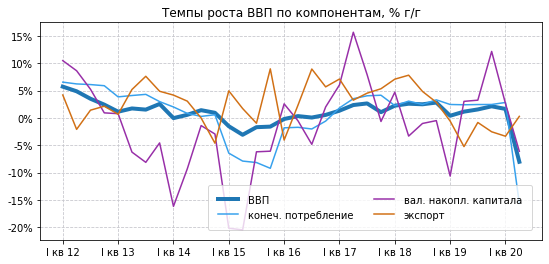

In [6]:
# Диаграмма с темпами роста по компонентам ВВП
fig,ax = plt.subplots()
fig.set_figwidth(9)

# список с названиями кварталов для для подписей на горизонтальной оси
x1=[x.replace('квартал','кв') for x in df.drop(df.index[:4]).index.values]
x1=[x.replace(' 20',' ') for x in x1]

y1=df.drop(df.index[:4])['GDPr_gr'].values
ax.plot(x1,y1,
        linewidth=4,
        label = 'ВВП'
       )

y2=df.drop(df.index[:4])['final_expr_gr'].values
ax.plot(x1,y2,
        color='#37a1ed',
        label='конеч. потребление'
       )

y3=df.drop(df.index[:4])['gross_accr_gr'].values
ax.plot(x1,y3,
        color='#982fa8',
        label = 'вал. накопл. капитала'
       )

y4=df.drop(df.index[:4])['expr_gr'].values
ax.plot(x1,y4,
        color ='#d17015',
        label = 'экспорт'
       )

# вывод легенды на диаграмме
ax.legend(loc = 'lower right',
          shadow = False,
          fontsize = 10, 
          ncol=2,
          borderaxespad = 1,
          borderpad = 1,
          handletextpad = 1,
          handlelength = 2
         )

# показать сетку
ax.grid(axis = 'both',
        linestyle = '--',
        color = '#c6c6ccd9')

ax.set_title('Темпы роста ВВП по компонентам, % г/г')
ax.set_xticks(x1[::4])
ax.yaxis.set_major_formatter(PercentFormatter(1,0))
plt.show()

### 2.3 Столбиковый график

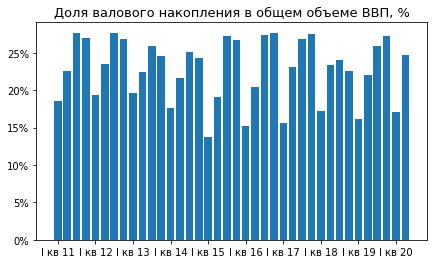

In [7]:
# Столбиковая диаграмма показывающая долю валового накопления в ВВП РФ
fig=plt.figure()
fig.set_figwidth(7)
ax = fig.add_subplot()

y1=df['gross_accn_share'].values
# список с названиями кварталов для для подписей на горизонтальной оси
x1=[x.replace('квартал','кв') for x in df.index.values]
x1=[x.replace(' 20',' ') for x in x1]

ax.bar(x1,y1)      

ax.set_title('Доля валового накопления в общем объеме ВВП, %',
             size=13)

ax.set_xticks(x1[::4])
# отображение подписей к вертикальной оси в формате процентов
ax.yaxis.set_major_formatter(PercentFormatter(1,0))
plt.show()




### 2.4 Диаграмма рассеяния (scatterplot)

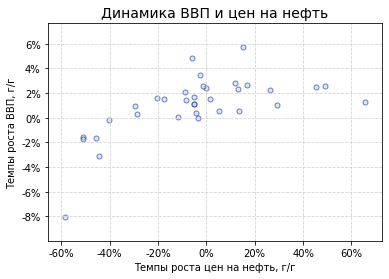

In [8]:
# отобразим темпы роста реального ВВП и цен на нефть (% г/г)

fig, ax = plt.subplots()

#
x1=df.drop(df.index[:4])['oil_price_gr'].values
y1=df.drop(df.index[:4])['GDPr_gr'].values

# задаем вид графика (scatterplot) и некоторые допольнительные параметры (s - размер точки)
ax.scatter(x1, y1,
           c = 'lightblue',
           alpha = 0.5,
           edgecolors = 'darkblue',
           s = 25
          )    #  цвет точек

# отображение подписей по осям в формате процентов
ax.set_title('Динамика ВВП и цен на нефть', size = 14)
ax.yaxis.set_major_formatter(PercentFormatter(1,0))
ax.xaxis.set_major_formatter(PercentFormatter(1,0))
ax.set_ylabel('Темпы роста ВВП, г/г')
ax.set_xlabel('Темпы роста цен на нефть, г/г')
ax.grid(linestyle='--', c= "lightgrey")
plt.show()
